<br>
<h1 style = "font-size:30px; font-weight : bold; color : black; text-align: center; border-radius: 10px 15px;"> World Development Indicators: Brazil Unemployment - Using SQL for Analysis </h1>
<br>

# Goals
The primary and personal goal that motivated the creation of this notebook was to practice SQL queries. Each specific goal was defined after its previous steps.

Goals:
- Explore the database to understand what type of data is presented in each table;
- Choosing a topic of interest (choice: unemployment) and select some relevant indicators among those available for Brazil;
- Extract the data related to the chosen indicators and prepare them for analysis;
- Create plots to analyze the unemployment in Brazil over time and compare the unemployment rate in different categories (by gender and education level or on the young population).

# <a id='0'>Content</a>

- <a href='#1'>Dataset Information</a>  
- <a href='#2'>Importing Packages and Exploring the Database</a>  
- <a href='#3'>Choosing Indicators</a>  
- <a href='#4'>Extracting and Manipulating the Data for Analysis</a>
- <a href='#5'>Bonus: Comparison within Latin America + World Map w/ Plotly</a>
- <a href='#6'>References</a>

# <a id="1">Dataset Information</a>

The World Development Indicators from the World Bank contain over a thousand annual indicators of economic development from hundreds of countries around the world.

|Table|Total Rows|Total Columns|
--- | --- | ---
|Country|247|31|
|CountryNotes|4857|3|
|FootNotes|532415|4|
|Indicators|5656458|6|
|Series|1345|20|
|SeriesNotes|369|3|

Last updated (2017)

## <center> If you find this notebook useful, support with an upvote! <center>

# <a id="2">Importing Packages and Exploring the Database</a> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sqlite3

Let's start by connecting to the database and creating a cursor to fetch the data

In [2]:
database_ref = "../input/world-development-indicators/database.sqlite"

conn = sqlite3.connect(database_ref)

cur = conn.cursor()

The first query we will be doing is to get the name of the tables in the database. 

> “Every SQLite database contains a single "schema table" that stores the schema for that database. The schema for a database is a description of all of the other tables, indexes, triggers, and views that are contained within the database” [(SQLite documentation)](https://www.sqlite.org/schematab.html).

We can refer to that schema table as ‘sqlite_master’.


In [3]:
#Getting tables names by querying 'sqlite_master'

list_of_tables_query = """
                      SELECT name
                      FROM sqlite_master
                      WHERE type='table';
                      """ 
cur.execute (list_of_tables_query)
print(cur.fetchall())

[('Country',), ('CountryNotes',), ('Series',), ('Indicators',), ('SeriesNotes',), ('Footnotes',)]


There are 6 tables in the database. Let’s execute some simple queries to see what’s the content in each table. We can use ‘pd.read_sql’ to frame the results as Pandas Dataframes. To better understand what we have, let's take look at each table.

In [4]:
country_query = """
                SELECT *
                FROM Country
                LIMIT 10;
                """ 
country = pd.read_sql(country_query, conn)

#Show all columns from dataframes #Increase column width
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 100

country

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). N...,South Asia,Low income,AF,2002/03,,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,,,,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are rescaled.,1996,Value added at basic prices (VAB),IBRD,,Country uses the 1993 System of National Accounts methodology.,,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09","Living Standards Measurement Study Survey (LSMS), 2011/12",Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,1980,,Value added at basic prices (VAB),IBRD,,Country uses the 1968 System of National Accounts methodology.,,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",,,2010,2013,2001
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,,East Asia & Pacific,Upper middle income,AS,,,,,,Country uses the 1968 System of National Accounts methodology.,,2011 (household consumption only).,,,Special trade system,,,2010,,,Yes,2007,,,
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,,Europe & Central Asia,High income: nonOECD,AD,2000,,Value added at basic prices (VAB),,,Country uses the 1968 System of National Accounts methodology.,,,,,Special trade system,,,2011. Population data compiled from administrative registers.,,,Yes,,,2006,
5,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onwa...",Sub-Saharan Africa,Upper middle income,AO,2002,,Value added at producer prices (VAP),IBRD,,Country uses the 1993 System of National Accounts methodology.,199196,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2014,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008/09",,2015,,,2005
6,ATG,Antigua and Barbuda,Antigua and Barbuda,Antigua and Barbuda,AG,East Caribbean dollar,"April 2012 database update: Based on official government statistics, national accounts data were...",Latin America & Caribbean,High income: nonOECD,AG,2006,,Value added at basic prices (VAB),IBRD,,Country uses the 1968 System of National Accounts methodology.,,2011,"IMF Balance of Payments Manual, 6th edition.",,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,,,Yes,2007,,2013,2005
7,ARB,Arab World,Arab World,Arab World,1A,,Arab World aggregate. Arab World is composed of members of the League of Arab State

In [5]:
countrynotes_query = """
                    SELECT *
                    FROM CountryNotes
                    LIMIT 10;
                    """ 
countrynotes = pd.read_sql(countrynotes_query, conn)

countrynotes

,Countrycode,Seriescode,Description
0,ABW,EG.EGY.PRIM.PP.KD,"Sources: Estimated based on UN Energy Statistics (2014); World Development Indicators, WDI (2014)"
1,ABW,EG.ELC.RNEW.ZS,Sources: UN Energy Statistics (2014)
2,ABW,EG.FEC.RNEW.ZS,Sources: UN Energy Statistics (2014)
3,ABW,SM.POP.NETM,Data sources : United Nations World Population Prospects
4,ABW,SM.POP.TOTL,Estimates are derived from data on foreign-born population.
5,ABW,SP.DYN.AMRT.FE,Data source : United Nations World Population Prospects
6,ABW,SP.DYN.AMRT.MA,Data source : United Nations World Population Prospects
7,ABW,SP.DYN.CBRT.IN,Data sources : United Nations World Population Prospects
8,ABW,SP.DYN.CDRT.IN,Data sources : United Nations World Population Prospects
9,ABW,SP.DYN.LE00.FE.IN,Data sources : United Nations World Population Prospects


In [6]:
series_query =  """
                SELECT *
                FROM series
                LIMIT 10;
                """
series = pd.read_sql(series_query, conn)

series

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
0,BN.KLT.DINV.CD,Economic Policy & Debt: Balance of payments: Capital & financial account,"Foreign direct investment, net (BoP, current US$)",,Foreign direct investment are the net inflows of investment to acquire a lasting management inte...,,Annual,,,,,,Note: Data are based on the sixth edition of the IMF's Balance of Payments Manual (BPM6) and are...,"International Monetary Fund, Balance of Payments Statistics Yearbook and data files.",,,,,,Open
1,BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: Capital & financial account,"Foreign direct investment, net inflows (% of GDP)",,Foreign direct investment are the net inflows of investment to acquire a lasting management inte...,,Annual,,,Weighted average,FDI data do not give a complete picture of international investment in an economy. Balance of pa...,,Note: Data starting from 2005 are based on the sixth edition of the IMF's Balance of Payments Ma...,"International Monetary Fund, International Financial Statistics and Balance of Payments database...",Data on equity flows are based on balance of payments data reported by the International Monetar...,Private financial flows - equity and debt - account for the bulk of development finance. Equity ...,,,,Open
2,BX.KLT.DINV.CD.WD,Economic Policy & Debt: Balance of payments: Capital & financial account,"Foreign direct investment, net inflows (BoP, current US$)",,Foreign direct investment refers to direct investment equity flows in the reporting economy. It ...,,Annual,,,Sum,FDI data do not give a complete picture of international investment in an economy. Balance of pa...,,Note: Data starting from 2005 are based on the sixth edition of the IMF's Balance of Payments Ma...,"International Monetary Fund, Balance of Payments database, supplemented by data from the United ...",Data on equity flows are based on balance of payments data reported by the International Monetar...,Private financial flows - equity and debt - account for the bulk of development finance. Equity ...,,,,Open
3,BM.KLT.DINV.GD.ZS,Economic Policy & Debt: Balance of payments: Capital & financial account,"Foreign direct investment, net outflows (% of GDP)",,Foreign direct investment are the net inflows of investment to acquire a lasting management inte...,,Annual,,,Weighted average,,,Note: Data are based on the sixth edition of the IMF's Balance of Payments Manual (BPM6) and are...,"International Monetary Fund, International Financial Statistics and Balance of Payments database...",,,,,,Open
4,BN.TRF.KOGT.CD,Economic Policy & Debt: Balance of payments: Capital & financial account,"Net capital account (BoP, current US$)",,"Net capital account records acquisitions and disposals of nonproduced nonfinancial assets, such ...",,Annual,,,,,,Note: Data are based on the sixth edition of the IMF's Balance of Payments Manual (BPM6) and are...,"International Monetary Fund, Balance of Payments Statistics Yearbook and data files.",,,,,,Open
5,BN.KAC.EOMS.CD,Economic Policy & Debt: Balance of payments: Capital & financial account,"Net errors and omissions (BoP, current US$)",,Net errors and omissions constitute a residual category needed to ensure that accounts in the ba...,,Annual,,,,,,Note: Data are based on the sixth edition of the IMF's Balance of Payments Manual (BPM6) and are...,"International Monetary Fund, Balance of Payments Statistics Yearbook and data files.",,,,,,Open
6,BN.FIN.TOTL.CD,Economic Policy & Debt: Balance of payments: Capital & financial account,"Net financial account (BoP, current US$)",,The net financial account shows net acquisition and disposal of financial assets and liabilities...,,Annual,,,,,,Note: Data are based on the sixth edi

In [7]:
seriesnotes_query = """
                    SELECT *
                    FROM SeriesNotes
                    LIMIT 10;
                    """
seriesnotes = pd.read_sql(seriesnotes_query, conn)

seriesnotes

,Seriescode,Year,Description
0,SP.ADO.TFRT,YR1960,Interpolated using data for 1957 and 1962.
1,SP.DYN.AMRT.FE,YR1960,"Interpolated using data for 1957 and 1962, if the data source is United Nations World Population..."
2,SP.DYN.AMRT.MA,YR1960,"Interpolated using data for 1957 and 1962, if the data source is United Nations World Population..."
3,SP.DYN.TO65.FE.ZS,YR1960,Interpolated using data for 1957 and 1962.
4,SP.DYN.TO65.MA.ZS,YR1960,Interpolated using data for 1957 and 1962.
5,SP.DYN.TO65.MA.ZS,YR1961,Interpolated using data for 1957 and 1962.
6,SP.DYN.TO65.FE.ZS,YR1961,Interpolated using data for 1957 and 1962.
7,SP.DYN.AMRT.MA,YR1961,"Interpolated using data for 1957 and 1962, if the data source is United Nations World Population..."
8,SP.DYN.AMRT.FE,YR1961,"Interpolated using data for 1957 and 1962, if the data source is United Nations World Population..."
9,SP.ADO.TFRT,YR1961,Interpolated using data for 1957 and 1962.


In [8]:
indicators_query = """
                    SELECT *
                    FROM Indicators
                    LIMIT 10;
                    """
indicators = pd.read_sql(indicators_query, conn)

indicators

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age population),SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age population)",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age population)",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (% of total),EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [9]:
footnotes_query = """
                    SELECT *
                    FROM FootNotes
                    LIMIT 10;
                    """
footnotes = pd.read_sql(footnotes_query, conn)

footnotes

,Countrycode,Seriescode,Year,Description
0,ABW,AG.LND.FRST.K2,YR1990,Not specified
1,ABW,AG.LND.FRST.K2,YR2000,Not specified
2,ABW,AG.LND.FRST.K2,YR2005,Not specified
3,ABW,BX.KLT.DINV.CD.WD,YR1987,"Source: United Nations Conference on Trade and Development, Foreign Direct Investment Online dat..."
4,ABW,BX.KLT.DINV.CD.WD,YR1988,"Source: United Nations Conference on Trade and Development, Foreign Direct Investment Online dat..."
5,ABW,BX.KLT.DINV.CD.WD,YR1989,"Source: United Nations Conference on Trade and Development, Foreign Direct Investment Online dat..."
6,ABW,BX.KLT.DINV.CD.WD,YR2013,"Source: United Nations Conference on Trade and Development, Foreign Direct Investment Online dat..."
7,ABW,DC.DAC.AUSL.CD,YR2000,Data are classified as official aid.
8,ABW,DC.DAC.AUSL.CD,YR2001,Data are classified as official aid.
9,ABW,DC.DAC.AUSL.CD,YR2002,Data are classified as official aid.


Few points about some tables:
- Country: Presents basic information about each country. We can use ‘CountryCode’ to execute JOIN with most tables.
- Series: Contains information about the available indicators. Connect with others through 'SeriesCode'.
- Indicators: Where all indicators’ values are stored. Connects with Series using IndicatorCode = SeriesCode and with Country using ‘CountryCode’.

The country of choice to be analyzed is Brazil. Before we move on, let’s just check if Brazil is presented in this database.

In [10]:
brazil_query = """
                SELECT *
                FROM country
                WHERE ShortName = 'Brazil';
                """

brazil_info = pd.read_sql(brazil_query, conn)
brazil_info

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,BRA,Brazil,Brazil,Federative Republic of Brazil,BR,Brazilian real,,Latin America & Caribbean,Upper middle income,BR,1995,2000,Value added at basic prices (VAB),IBRD,,Country uses the 1993 System of National Accounts methodology.,,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",,2006,2011,2013,2010


# <a id="3">Choosing Indicators</a>

Let’s see what indicators about Brazil are available. We can search for them using CountryCode = ‘BRA’.  Since for every indicator there are several rows representing the obtained value of each year, we will use SELECT DISTINCT to avoid getting repeated names.

In [11]:
#Using SELECT DISTINCT to not get repeated values 
brazil_indicators_query = """
                            SELECT DISTINCT IndicatorName
                            FROM Indicators
                            WHERE CountryCode = 'BRA';
                            """

brazil_indicators = pd.read_sql(brazil_indicators_query, conn)
brazil_indicators

,IndicatorName
0,"Adolescent fertility rate (births per 1,000 women ages 15-19)"
1,Age dependency ratio (% of working-age population)
2,"Age dependency ratio, old (% of working-age population)"
3,"Age dependency ratio, young (% of working-age population)"
4,"Agriculture, value added (% of GDP)"
...,...
1223,Present value of external debt (current US$)
1224,"Bird species, threatened"
1225,"Fish species, threatened"
1226,"Mammal species, threatened"


There are over a thousand of indicators. Instead of trying to read one by one, it makes much more sense to see what topics are available, choose a topic of interest and then query its indicators.

In [12]:
topics_query = """
                SELECT DISTINCT Topic
                FROM Series;
                """

topics = pd.read_sql(topics_query, conn)
topics

,Topic
0,Economic Policy & Debt: Balance of payments: Capital & financial account
1,Economic Policy & Debt: Balance of payments: Current account: Balances
2,"Economic Policy & Debt: Balance of payments: Current account: Goods, services & income"
3,Economic Policy & Debt: Balance of payments: Current account: Transfers
4,Economic Policy & Debt: Balance of payments: Reserves & other items
...,...
86,Social Protection & Labor: Economic activity
87,Social Protection & Labor: Labor force structure
88,Social Protection & Labor: Migration
89,Social Protection & Labor: Performance


Putting all topics on a list

In [13]:
topics_list = [x for x in topics['Topic']] 
topics_list

['Economic Policy & Debt: Balance of payments: Capital & financial account',
 'Economic Policy & Debt: Balance of payments: Current account: Balances',
 'Economic Policy & Debt: Balance of payments: Current account: Goods, services & income',
 'Economic Policy & Debt: Balance of payments: Current account: Transfers',
 'Economic Policy & Debt: Balance of payments: Reserves & other items',
 'Economic Policy & Debt: External debt: Amortization',
 'Economic Policy & Debt: External debt: Arrears, reschedulings, etc.',
 'Economic Policy & Debt: External debt: Commitments',
 'Economic Policy & Debt: External debt: Currency composition',
 'Economic Policy & Debt: External debt: Debt outstanding',
 'Economic Policy & Debt: External debt: Debt ratios & other items',
 'Economic Policy & Debt: External debt: Debt service',
 'Economic Policy & Debt: External debt: Disbursements',
 'Economic Policy & Debt: External debt: Interest',
 'Economic Policy & Debt: External debt: Net flows',
 'Economic Poli

There is a lot of interesting topics for us to choose. In this notebook, we will be focusing on the ‘unemployment’ topic. Let’s find out which indicators are available.

In [14]:
indicators_unemployment_query = """
                                SELECT SeriesCode, IndicatorName
                                FROM Series
                                WHERE Topic LIKE '%Unemployment';
                                """
indicators_unemployment = pd.read_sql(indicators_unemployment_query, conn)
indicators_unemployment

,SeriesCode,IndicatorName
0,SL.UEM.LTRM.ZS,Long-term unemployment (% of total unemployment)
1,SL.UEM.LTRM.FE.ZS,"Long-term unemployment, female (% of female unemployment)"
2,SL.UEM.LTRM.MA.ZS,"Long-term unemployment, male (% of male unemployment)"
3,SL.UEM.NEET.FE.ZS,"Share of youth not in education, employment or training, female (% of female youth population)"
4,SL.UEM.NEET.MA.ZS,"Share of youth not in education, employment or training, male (% of male youth population)"
5,SL.UEM.NEET.ZS,"Share of youth not in education, employment or training, total (% of youth population)"
6,SL.UEM.PRIM.ZS,Unemployment with primary education (% of total unemployment)
7,SL.UEM.PRIM.FE.ZS,"Unemployment with primary education, female (% of female unemployment)"
8,SL.UEM.PRIM.MA.ZS,"Unemployment with primary education, male (% of male unemployment)"
9,SL.UEM.SECO.ZS,Unemployment with secondary education (% of total unemployment)


There are 27 indicators related to unemployment, but we didn’t specify in the query that the indicators should be available for Brazil. The Series table doesn’t have a column for Country Code, but the Indicators table does. With INNER JOIN, we can define what indicators we want based on conditions related to both tables (Country Code from Indicators and Topic from Series).

In [15]:
indicators_unemployment_bra_query = """
                                SELECT DISTINCT s.SeriesCode, s.IndicatorName
                                FROM Series AS s
                                INNER JOIN Indicators AS i
                                    ON i.IndicatorCode = s.SeriesCode
                                WHERE i.CountryCode = 'BRA' AND s.Topic LIKE '%Unemployment';
                                """
indicators_unemployment_bra = pd.read_sql(indicators_unemployment_bra_query, conn)
indicators_unemployment_bra

,SeriesCode,IndicatorName
0,SL.UEM.TOTL.FE.NE.ZS,"Unemployment, female (% of female labor force) (national estimate)"
1,SL.UEM.TOTL.MA.NE.ZS,"Unemployment, male (% of male labor force) (national estimate)"
2,SL.UEM.TOTL.NE.ZS,"Unemployment, total (% of total labor force) (national estimate)"
3,SL.UEM.1524.FE.NE.ZS,"Unemployment, youth female (% of female labor force ages 15-24) (national estimate)"
4,SL.UEM.1524.MA.NE.ZS,"Unemployment, youth male (% of male labor force ages 15-24) (national estimate)"
5,SL.UEM.1524.NE.ZS,"Unemployment, youth total (% of total labor force ages 15-24) (national estimate)"
6,SL.UEM.TOTL.FE.ZS,"Unemployment, female (% of female labor force) (modeled ILO estimate)"
7,SL.UEM.TOTL.MA.ZS,"Unemployment, male (% of male labor force) (modeled ILO estimate)"
8,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
9,SL.UEM.1524.FE.ZS,"Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)"


When we define ‘CountryCode’ = ‘BRA’, we find 25 indicators instead of 27. Let’s check which ones aren’t available.

In [16]:
indicators_unemployment['IndicatorName'].isin(indicators_unemployment_bra['IndicatorName'])

0      True
1     False
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
Name: IndicatorName, dtype: bool

The missing indicators are the ones for long-term unemployment based on gender.

Now that we have the list of available indicators about unemployment, we could simply make a query for each indicator based on its code and plot the result, like in the example below.

In [17]:
unemployment_bra_query = """
                        SELECT Year, Value
                        FROM Indicators
                        WHERE CountryCode = 'BRA' AND IndicatorCode = 'SL.UEM.TOTL.NE.ZS';
                        """
unemployment_bra = pd.read_sql(unemployment_bra_query, conn)
unemployment_bra

,Year,Value
0,1981,4.3
1,1982,3.9
2,1983,4.9
3,1984,4.3
4,1985,3.4
5,1986,2.4
6,1987,3.6
7,1988,3.8
8,1989,3.0
9,1990,3.7


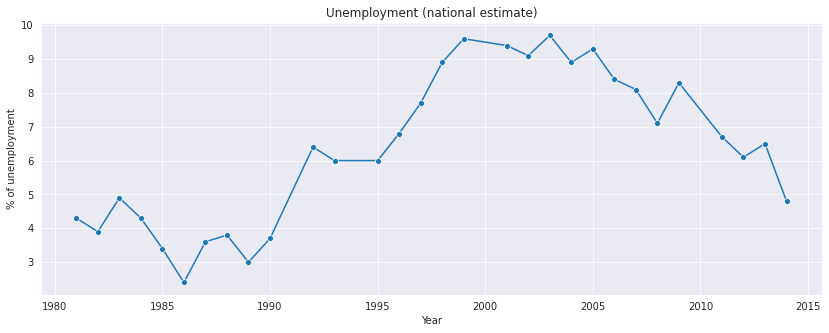

In [18]:
sns.set_style("darkgrid")

plt.figure(figsize=(14,5))

sns.lineplot(data = unemployment_bra, x = 'Year', y = 'Value', marker = 'o')

plt.title('Unemployment (national estimate)')
plt.ylabel('% of unemployment')
#plt.xticks(unemployment_bra['Year'])

plt.show()

In this notebook, we will extract the information about the desired indicators at once and then treat them with our knowledge on the Pandas package.

We still have some choices to make. We have some indicators that seem to be repeated (e.g. ‘Unemployment, total’) where the difference is how they were obtained (national estimate or modeled ILO estimate). Let’s get the ‘Unemployment, total’ indicators and see how they are different from each other.

In [19]:
total_unemployment_ilo_query = """
                                SELECT Year, Value
                                FROM Indicators
                                WHERE CountryCode = 'BRA' AND IndicatorCode = 'SL.UEM.TOTL.ZS';
                                """
total_unemployment_ilo = pd.read_sql(total_unemployment_ilo_query, conn)
total_unemployment_ilo

,Year,Value
0,1991,6.9
1,1992,6.4
2,1993,6.0
3,1994,6.0
4,1995,6.0
5,1996,6.8
6,1997,7.7
7,1998,8.9
8,1999,9.6
9,2000,9.5


In [20]:
total_unemployment_ne_query = """
                                SELECT Year, Value
                                FROM Indicators
                                WHERE CountryCode = 'BRA' AND IndicatorCode = 'SL.UEM.TOTL.NE.ZS';
                                """
total_unemployment_ne = pd.read_sql(total_unemployment_ne_query, conn)
total_unemployment_ne

,Year,Value
0,1981,4.3
1,1982,3.9
2,1983,4.9
3,1984,4.3
4,1985,3.4
5,1986,2.4
6,1987,3.6
7,1988,3.8
8,1989,3.0
9,1990,3.7


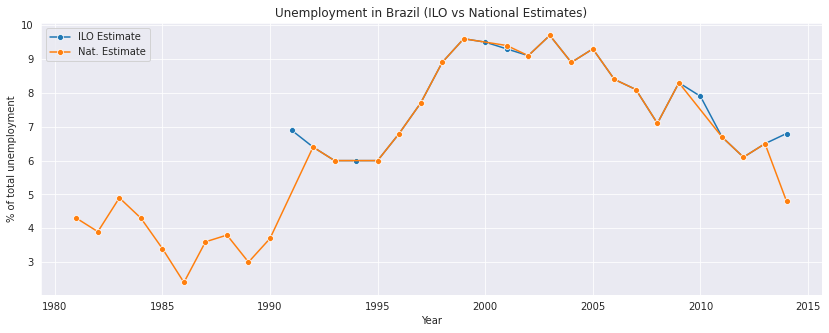

In [21]:
plt.figure(figsize=(14,5))

sns.lineplot(data = total_unemployment_ilo, x = 'Year', y = 'Value', marker = 'o', label = 'ILO Estimate')
sns.lineplot(data = total_unemployment_ne, x = 'Year', y = 'Value', marker = 'o', label = 'Nat. Estimate')

plt.title('Unemployment in Brazil (ILO vs National Estimates)')
plt.ylabel('% of total unemployment')
plt.legend(loc = 'upper left')

plt.show()

Apart from the fact that the ILO estimate doesn’t have any record before 1991 and that the national estimate has a few missing values, the results between the two are quite similar. I’ll be making the choice of dropping ‘national estimate’ indicators when the ILO estimate is available. If you have the interest to understand how the ILO estimates work, [you can read about it on this link](https://www.ilo.org/ilostat-files/Documents/TEM.pdf#:~:text=The%20ILO%20modelled%20estimates%20generally%20rely%20on%20a,the%20expected%20error%20and%20variance%20of%20the%20estimation.).

We saw that some indicators started to be recorded later than others. We can practice some aggregate functions to find the number of records, the first and the last year of record available for each indicator. In this query, we will be dropping the indicators that have ‘national estimate’ on their names.

In [22]:
unemployment_bra_query = """
                        SELECT s.SeriesCode, s.IndicatorName, 
                            COUNT(s.SeriesCode) AS num_records, MIN(i.Year) AS min_year, MAX(i.Year) AS max_year
                        FROM Series AS s
                        INNER JOIN Indicators AS i
                            ON i.IndicatorCode = s.SeriesCode
                        WHERE i.CountryCode = 'BRA' AND s.Topic LIKE '%Unemployment' 
                            AND s.IndicatorName NOT LIKE '%national estimate%'
                        GROUP BY s.SeriesCode
                        ORDER BY num_records DESC;
                        """
unemployment_bra = pd.read_sql(unemployment_bra_query, conn)
unemployment_bra

,SeriesCode,IndicatorName,num_records,min_year,max_year
0,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (modeled ILO estimate)",24,1991,2014
1,SL.UEM.TOTL.MA.ZS,"Unemployment, male (% of male labor force) (modeled ILO estimate)",24,1991,2014
2,SL.UEM.TOTL.FE.ZS,"Unemployment, female (% of female labor force) (modeled ILO estimate)",24,1991,2014
3,SL.UEM.1524.ZS,"Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",24,1991,2014
4,SL.UEM.1524.MA.ZS,"Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)",24,1991,2014
5,SL.UEM.1524.FE.ZS,"Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)",24,1991,2014
6,SL.UEM.TERT.ZS,Unemployment with tertiary education (% of total unemployment),10,2001,2013
7,SL.UEM.TERT.MA.ZS,"Unemployment with tertiary education, male (% of male unemployment)",10,2001,2013
8,SL.UEM.TERT.FE.ZS,"Unemployment with tertiary education, female (% of female unemployment)",10,2001,2013
9,SL.UEM.SECO.ZS,Unemployment with secondary education (% of total unemployment),10,2001,2013


Unfortunately, three interesting indicators have only 6 records (‘Share of youth not in education, employment or training’). They will be dropped from the final list of indicators.

# <a id="4">Extracting and Manipulating the Data for Analysis</a>

Let’s make our final SQL query to obtain all the data related to the selected indicators. We can make small modifications to our previous query and use it as a common table expression (CTE). This query will be referred as ‘Final_Indicators’ and, from it, we retrieve the data.

In [23]:
final_query = """
                        WITH Final_Indicators AS
                        (
                            SELECT i.IndicatorName, i.Year, i.Value
                            FROM indicators AS i
                            INNER JOIN Series AS s
                                ON i.IndicatorCode = s.SeriesCode
                            WHERE i.CountryCode = 'BRA' AND s.Topic LIKE '%Unemployment' 
                                AND s.IndicatorName NOT LIKE '%national estimate%'
                                AND s.IndicatorName NOT LIKE 'Share%'
                        )  
                        
                        SELECT IndicatorName, Year, Value
                        FROM Final_Indicators;
                        """

final = pd.read_sql(final_query, conn)
final

,IndicatorName,Year,Value
0,"Unemployment, female (% of female labor force)",1991,9.600000
1,"Unemployment, male (% of male labor force)",1991,5.300000
2,"Unemployment, total (% of total labor force)",1991,6.900000
3,"Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)",1991,18.799999
4,"Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)",1991,11.300000
...,...,...,...
239,"Unemployment, male (% of male labor force)",2014,5.200000
240,"Unemployment, total (% of total labor force)",2014,6.800000
241,"Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)",2014,19.000000
242,"Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)",2014,12.300000


Using the ‘pd.pivot’ function, we can transform the dataframe extracted into something we are more used to work with. With ‘Year’ serving as index, each indicator will be converted to a column on the new dataframe.

In [24]:
df = final.copy().pivot(index = 'Year', columns = 'IndicatorName', values='Value')
df

IndicatorName,Long-term unemployment (% of total unemployment),Unemployment with primary education (% of total unemployment),"Unemployment with primary education, female (% of female unemployment)","Unemployment with primary education, male (% of male unemployment)",Unemployment with secondary education (% of total unemployment),"Unemployment with secondary education, female (% of female unemployment)","Unemployment with secondary education, male (% of male unemployment)",Unemployment with tertiary education (% of total unemployment),"Unemployment with tertiary education, female (% of female unemployment)","Unemployment with tertiary education, male (% of male unemployment)","Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)"
Year,,,,,,,,,,,,,,,,
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,5.3,6.9,18.799999,11.3,14.200000
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5.4,6.4,15.000000,9.9,11.900000
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.3,5.2,6.0,14.100000,9.7,11.400000
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.3,5.1,6.0,14.100000,9.7,11.400000
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.3,5.1,6.0,14.100000,9.7,11.400000
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,5.5,6.8,16.100000,10.3,12.600000
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.9,6.2,7.7,18.299999,11.7,14.400000
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5,7.1,8.9,22.200001,13.8,17.200001
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.1,7.8,9.6,22.799999,15.0,18.200001


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1991 to 2014
Data columns (total 16 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Long-term unemployment (% of total unemployment)                                        10 non-null     float64
 1   Unemployment with primary education (% of total unemployment)                           10 non-null     float64
 2   Unemployment with primary education, female (% of female unemployment)                  10 non-null     float64
 3   Unemployment with primary education, male (% of male unemployment)                      10 non-null     float64
 4   Unemployment with secondary education (% of total unemployment)                         10 non-null     float64
 5   Unemployment with secondary education, female (% of female unemploym

Let’s simplify those column names.

In [26]:
new_names = ['Long-term', 'Primary education', 'Primary education - Female', 'Primary education - Male'
            , 'Secondary education', 'Secondary education - Female', 'Secondary education - Male'
            , 'Tertiary education', 'Tertiary education - Female', 'Tertiary education - Male'
            , 'Female', 'Male', 'Total', 'Youth Female', 'Youth Male', 'Youth Total']
df = df.set_axis(new_names, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1991 to 2014
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Long-term                     10 non-null     float64
 1   Primary education             10 non-null     float64
 2   Primary education - Female    10 non-null     float64
 3   Primary education - Male      10 non-null     float64
 4   Secondary education           10 non-null     float64
 5   Secondary education - Female  10 non-null     float64
 6   Secondary education - Male    10 non-null     float64
 7   Tertiary education            10 non-null     float64
 8   Tertiary education - Female   10 non-null     float64
 9   Tertiary education - Male     10 non-null     float64
 10  Female                        24 non-null     float64
 11  Male                          24 non-null     float64
 12  Total                         24 non-null     float64
 13  Yo

Finally, the data is ready to be plotted and analyzed.

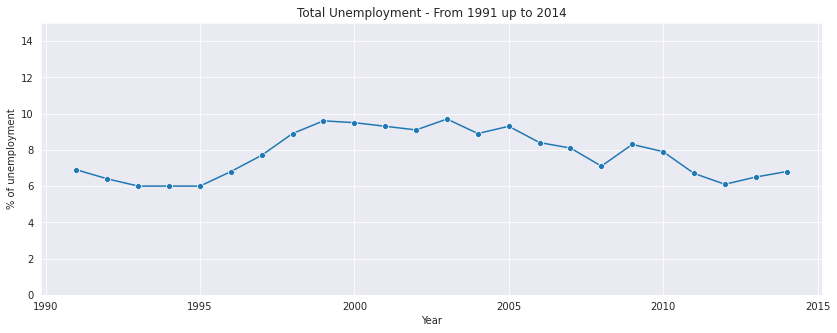

In [27]:
#sns.set_style("darkgrid")

plt.figure(figsize=(14,5))

sns.lineplot(data = df, x = df.index, y = 'Total', marker = 'o')
plt.title('Total Unemployment - From 1991 up to 2014')
plt.ylim((0,15))
#plt.yticks(range(0,110,10))
plt.ylabel('% of unemployment')

plt.show()

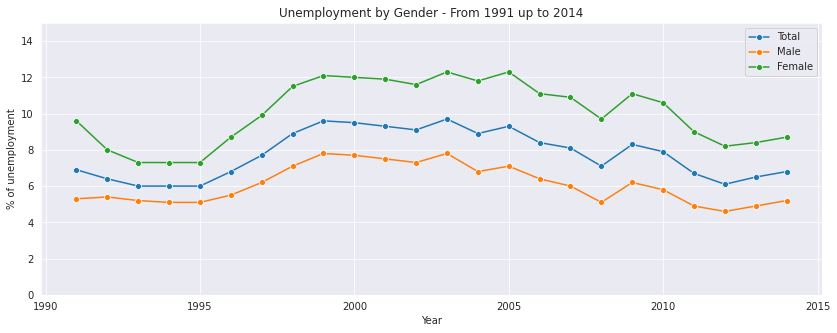

In [28]:
plt.figure(figsize=(14,5))

sns.lineplot(data = df, x = df.index, y = 'Total', marker = 'o', label = 'Total')
sns.lineplot(data = df, x = df.index, y = 'Male', marker = 'o', label = 'Male')
sns.lineplot(data = df, x = df.index, y = 'Female', marker = 'o', label = 'Female')

plt.title('Unemployment by Gender - From 1991 up to 2014')
plt.ylim((0,15))
#plt.yticks(range(0,110,10))
plt.ylabel('% of unemployment')
plt.legend()

plt.show()

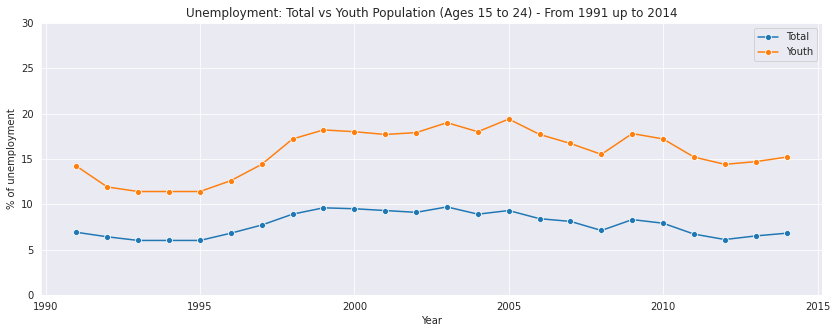

In [29]:
plt.figure(figsize=(14,5))

sns.lineplot(data = df, x = df.index, y = 'Total', marker = 'o', label = 'Total')
sns.lineplot(data = df, x = df.index, y = 'Youth Total', marker = 'o', label = 'Youth')

plt.title('Unemployment: Total vs Youth Population (Ages 15 to 24) - From 1991 up to 2014')
plt.ylim((0,30))
#plt.yticks(range(0,110,10))
plt.ylabel('% of unemployment')
plt.legend()

plt.show()

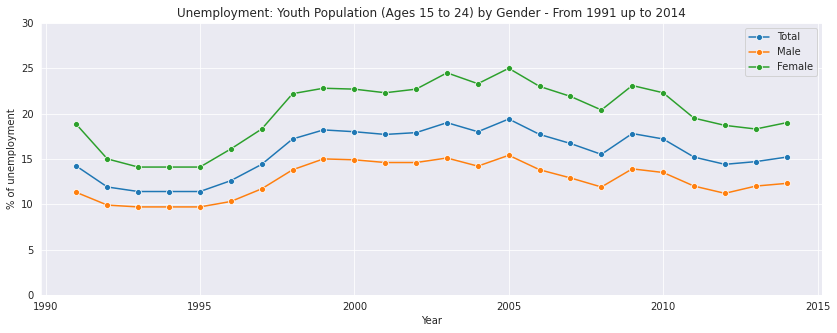

In [30]:
plt.figure(figsize=(14,5))

sns.lineplot(data = df, x = df.index, y = 'Youth Total', marker = 'o', label = 'Total')
sns.lineplot(data = df, x = df.index, y = 'Youth Male', marker = 'o', label = 'Male')
sns.lineplot(data = df, x = df.index, y = 'Youth Female', marker = 'o', label = 'Female')

plt.title('Unemployment: Youth Population (Ages 15 to 24) by Gender - From 1991 up to 2014')
plt.ylim((0,30))
#plt.yticks(range(0,110,10))
plt.ylabel('% of unemployment')
plt.legend()

plt.show()

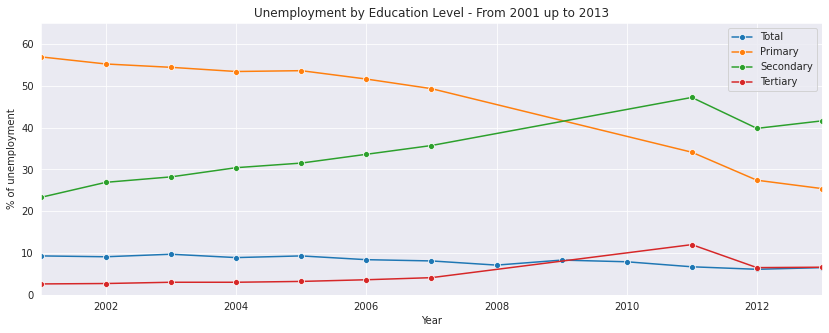

In [31]:
plt.figure(figsize=(14,5))

sns.lineplot(data = df, x = df.index, y = 'Total', marker = 'o', label = 'Total')
sns.lineplot(data = df, x = df.index, y = 'Primary education', marker = 'o', label = 'Primary')
sns.lineplot(data = df, x = df.index, y = 'Secondary education', marker = 'o', label = 'Secondary')
sns.lineplot(data = df, x = df.index, y = 'Tertiary education', marker = 'o', label = 'Tertiary')

plt.title('Unemployment by Education Level - From 2001 up to 2013')
plt.ylim((0,65))
#plt.yticks(range(0,110,10))
plt.ylabel('% of unemployment')
plt.xlim((2001,2013))
plt.legend()

plt.show()

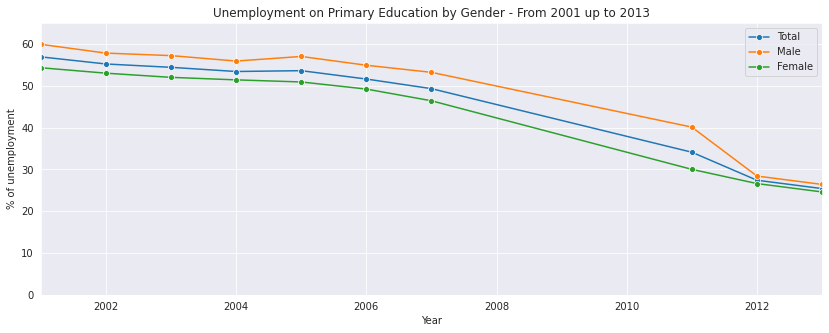

In [32]:
plt.figure(figsize=(14,5))

sns.lineplot(data = df, x = df.index, y = 'Primary education', marker = 'o', label = 'Total')
sns.lineplot(data = df, x = df.index, y = 'Primary education - Male', marker = 'o', label = 'Male')
sns.lineplot(data = df, x = df.index, y = 'Primary education - Female', marker = 'o', label = 'Female')

plt.title('Unemployment on Primary Education by Gender - From 2001 up to 2013')
plt.ylim((0,65))
#plt.yticks(range(0,110,10))
plt.ylabel('% of unemployment')
plt.xlim((2001,2013))
plt.legend()

plt.show()

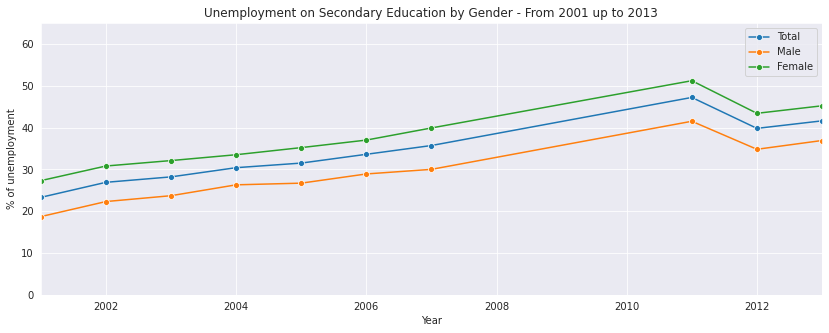

In [33]:
plt.figure(figsize=(14,5))

sns.lineplot(data = df, x = df.index, y = 'Secondary education', marker = 'o', label = 'Total')
sns.lineplot(data = df, x = df.index, y = 'Secondary education - Male', marker = 'o', label = 'Male')
sns.lineplot(data = df, x = df.index, y = 'Secondary education - Female', marker = 'o', label = 'Female')

plt.title('Unemployment on Secondary Education by Gender - From 2001 up to 2013')
plt.ylim((0,65))
#plt.yticks(range(0,110,10))
plt.ylabel('% of unemployment')
plt.xlim((2001,2013))
plt.legend()

plt.show()

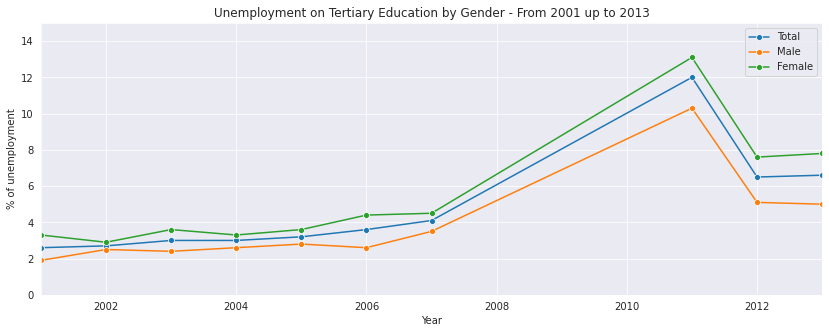

In [34]:
plt.figure(figsize=(14,5))

sns.lineplot(data = df, x = df.index, y = 'Tertiary education', marker = 'o', label = 'Total')
sns.lineplot(data = df, x = df.index, y = 'Tertiary education - Male', marker = 'o', label = 'Male')
sns.lineplot(data = df, x = df.index, y = 'Tertiary education - Female', marker = 'o', label = 'Female')

plt.title('Unemployment on Tertiary Education by Gender - From 2001 up to 2013')
plt.ylim((0,15))
#plt.yticks(range(0,110,10))
plt.ylabel('% of unemployment')
plt.xlim((2001,2013))
plt.legend()

plt.show()

# <a id="5">Bonus: Comparison within Latin America + World Map w/ Plotly</a>

We start this section by querying the unemployment rate in 2014 on countries within the same region as Brazil (Latin America). The ‘region’ column is found in the ‘Country’ table, so we need to apply an inner join to filter the results.

In [35]:
regional_2014_query = """
                        SELECT i.Value, i.CountryName
                        FROM Indicators AS i
                        INNER JOIN Country AS c
                            ON i.CountryName = c.ShortName
                        WHERE i.IndicatorCode = 'SL.UEM.TOTL.ZS' AND i.Year = 2014
                            AND c.Region LIKE 'Latin America%'
                        ORDER BY i.Value DESC;
                        """
regional_2014 = pd.read_sql(regional_2014_query, conn)
regional_2014

,Value,CountryName
0,15.0,Dominican Republic
1,14.3,Puerto Rico
2,13.2,Jamaica
3,12.0,Barbados
4,11.5,Belize
5,11.1,Guyana
6,10.1,Colombia
7,8.3,Costa Rica
8,8.2,Argentina
9,7.0,Uruguay


Now, we create a barplot for better visualization

In [36]:
fig = px.bar(regional_2014, x="Value", y="CountryName", orientation = 'h', height = 800)

fig.update_layout(
    title=dict(
        text='Unemployment Rate in Latin America & Caribbean - 2014',
        x=0.5,
    ),      
    xaxis=dict(
        title='Unemployment Rate',
        titlefont_size=16,
    ),    
    yaxis=dict(
        title='Countries',
        titlefont_size=16,
    ),
)
fig.show()

To visualize the evolution of the unemployment rate from 1991 to 2014, we can create an animated barplot with Plotly. For this task, I’ll be selecting only Brazil and a few neighbor countries.

In [37]:
regional_query = """
                SELECT i.Year, i.Value, i.CountryName
                FROM Indicators AS i
                INNER JOIN Country AS c
                    ON i.CountryName = c.ShortName
                WHERE i.IndicatorCode = 'SL.UEM.TOTL.ZS'
                    AND c.ShortName IN ('Brazil','Argentina','Uruguay','Chile','Colombia','Peru')
                ORDER BY i.CountryName;
                """
regional = pd.read_sql(regional_query, conn)
regional

,Year,Value,CountryName
0,1991,5.800000,Argentina
1,1992,6.700000,Argentina
2,1993,10.100000,Argentina
3,1994,12.100000,Argentina
4,1995,18.799999,Argentina
...,...,...,...
139,2010,7.200000,Uruguay
140,2011,6.300000,Uruguay
141,2012,6.500000,Uruguay
142,2013,6.600000,Uruguay


In [38]:
fig = px.bar(regional, x="Value", y="CountryName", orientation = 'h', height = 500 
             , animation_frame= "Year", range_x=[0,20])

fig.update_layout(
    title=dict(
        text='Unemployment Rate in Latin America & Caribbean - 1991 to 2014',
        x=0.5,
    ),      
    xaxis=dict(
        title='Unemployment Rate',
        titlefont_size=16,
    ),    
    yaxis=dict(
        title='Countries',
        titlefont_size=16,
    ),
)

#https://community.plotly.com/t/how-to-slow-down-animation-in-plotly-express/31309/6
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000

fig.show()

Another interesting feature of Plotly is the ability to plot choropleth maps. Let’s finish this notebook by showing the unemployment landscape worldwide with two maps: one static map showing the unemployment in 2014 and one animated map showing the evolution from 1991 to 2014. 

In [39]:
world_unemployment_2014_query = """
                                SELECT Year, Value, CountryName
                                FROM Indicators
                                WHERE IndicatorCode = 'SL.UEM.TOTL.ZS' AND Year = 2014
                                ORDER BY CountryName;
                                """
world_unemployment_2014 = pd.read_sql(world_unemployment_2014_query, conn)
world_unemployment_2014

,Year,Value,CountryName
0,2014,9.100000,Afghanistan
1,2014,16.100000,Albania
2,2014,9.500000,Algeria
3,2014,6.800000,Angola
4,2014,11.524657,Arab World
...,...,...,...
201,2014,26.200001,West Bank and Gaza
202,2014,5.933420,World
203,2014,17.400000,"Yemen, Rep."
204,2014,13.300000,Zambia


In [40]:
fig = px.choropleth(world_unemployment_2014, locations="CountryName", locationmode='country names',
                    color="Value",
                    hover_name="CountryName",
                    color_continuous_scale=px.colors.sequential.Jet,
                    labels= {'Value': 'Rate'},
                    title = 'Unemployment Worldwide - 2014')

fig.update(layout=dict(title=dict(x=0.5)))

fig.show()

In [41]:
world_unemployment_all_query = """
                                SELECT Year, Value, CountryName
                                FROM Indicators
                                WHERE IndicatorCode = 'SL.UEM.TOTL.ZS'
                                ORDER BY CountryName;
                                """
world_unemployment_all = pd.read_sql(world_unemployment_all_query, conn)
world_unemployment_all

,Year,Value,CountryName
0,1991,8.6,Afghanistan
1,1992,8.6,Afghanistan
2,1993,8.6,Afghanistan
3,1994,8.5,Afghanistan
4,1995,8.5,Afghanistan
...,...,...,...
4939,2010,5.5,Zimbabwe
4940,2011,5.4,Zimbabwe
4941,2012,5.3,Zimbabwe
4942,2013,5.3,Zimbabwe


In [42]:
fig = px.choropleth(world_unemployment_all, locations="CountryName", locationmode='country names',
                    color="Value",
                    hover_name="CountryName",
                    color_continuous_scale=px.colors.sequential.Jet,
                    animation_frame= "Year", range_color = [0,40],
                    labels= {'Value': 'Rate'},
                    title = 'Unemployment Worldwide - 1991 to 2014')

fig.update(layout=dict(title=dict(x=0.5)))

#https://community.plotly.com/t/how-to-slow-down-animation-in-plotly-express/31309/6
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
           
fig.show()

# <a id="6">References</a>

- https://www.sqlite.org/schematab.html
- https://www.ilo.org/ilostat-files/Documents/TEM.pdf#:~:text=The%20ILO%20modelled%20estimates%20generally%20rely%20on%20a,the%20expected%20error%20and%20variance%20of%20the%20estimation
- https://community.plotly.com/t/how-to-slow-down-animation-in-plotly-express/31309/6

## <center> If you find this notebook useful, support with an upvote! <center>